In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np # MATRIX OPERATIONS
import pandas as pd # EFFICIENT DATA STRUCTURES
import matplotlib.pyplot as plt # GRAPHING AND VISUALIZATIONS
import math # MATHEMATICAL OPERATIONS
import cv2 # IMAGE PROCESSING - OPENCV
from glob import glob # FILE OPERATIONS
import itertools
import os

In [3]:
# KERAS AND SKLEARN MODULES
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.python.framework import ops
ops.reset_default_graph()

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 16

# GLOBAL VARIABLES
SCALE = 70
SEED = 7
np.random.seed(SEED)

Using TensorFlow backend.


In [4]:
#List of Classes/Labels
os.listdir("./train")

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [5]:
path_to_train = 'train/*/*.png'
path_to_test = 'test/*.png'

images_train = glob(path_to_train)
images_test  = glob(path_to_test)

trainSet = []
trainLabels = []
testset = []
tests = []

num_train = len(images_train)
num_test  = len(images_test)


In [6]:
images_train

['train\\Black-grass\\0050f38b3.png',
 'train\\Black-grass\\0183fdf68.png',
 'train\\Black-grass\\0260cffa8.png',
 'train\\Black-grass\\05eedce4d.png',
 'train\\Black-grass\\075d004bc.png',
 'train\\Black-grass\\078eae073.png',
 'train\\Black-grass\\082314602.png',
 'train\\Black-grass\\0ace21089.png',
 'train\\Black-grass\\0b228a6b8.png',
 'train\\Black-grass\\0b3e7a7a9.png',
 'train\\Black-grass\\0bb75ded8.png',
 'train\\Black-grass\\0be707615.png',
 'train\\Black-grass\\0c67c3fc3.png',
 'train\\Black-grass\\0d1a9985f.png',
 'train\\Black-grass\\0d28c429b.png',
 'train\\Black-grass\\0d4f74f4a.png',
 'train\\Black-grass\\0dad57e7f.png',
 'train\\Black-grass\\0e91f92a1.png',
 'train\\Black-grass\\0fe440ed5.png',
 'train\\Black-grass\\1276dffba.png',
 'train\\Black-grass\\129c51855.png',
 'train\\Black-grass\\13a7f553a.png',
 'train\\Black-grass\\14719a83e.png',
 'train\\Black-grass\\1576ce9fd.png',
 'train\\Black-grass\\163c13912.png',
 'train\\Black-grass\\163e571a6.png',
 'train\\Bla

In [7]:
trainLabels

[]

In [8]:
#READING IMAGES AND RESIZING THEM
count = 1
for i in images_train:
    print(str(count)+'/'+str(num_train),end='\r')
    trainSet.append(cv2.resize(cv2.imread(i),(SCALE,SCALE)))
    count = count + 1
trainSet = np.asarray(trainSet)

In [9]:
trainSet

array([[[[ 22,  46,  77],
         [ 38,  60,  83],
         [ 69,  88, 107],
         ...,
         [ 75,  87,  98],
         [ 55,  75,  86],
         [ 58,  82,  91]],

        [[ 27,  50,  83],
         [ 46,  65,  90],
         [ 30,  50,  75],
         ...,
         [ 63,  76,  89],
         [ 58,  72,  83],
         [ 59,  74,  86]],

        [[ 33,  58,  87],
         [ 28,  50,  78],
         [ 31,  52,  76],
         ...,
         [ 64,  76,  91],
         [ 57,  69,  83],
         [ 52,  67,  80]],

        ...,

        [[156, 149, 143],
         [153, 146, 142],
         [106, 100,  99],
         ...,
         [156, 149, 144],
         [145, 138, 135],
         [ 69,  62,  71]],

        [[157, 150, 144],
         [152, 146, 141],
         [106,  99,  99],
         ...,
         [159, 151, 147],
         [147, 140, 136],
         [ 71,  66,  71]],

        [[156, 150, 143],
         [151, 146, 139],
         [101,  97,  96],
         ...,
         [159, 150, 144],
        

In [10]:
images_train[0].split('\\')

['train', 'Black-grass', '0050f38b3.png']

In [11]:
#READING IMAGES AND RESIZING THEM
count = 1
for i in images_train:
    #print(i)
    print(str(count)+'/'+str(num_train),end='\r')
    trainLabels.append(i.split('\\')[-2])
    count = count + 1

trainLabels = pd.DataFrame(trainLabels)

train\Black-grass\0050f38b3.png
train\Black-grass\0183fdf68.png
train\Black-grass\0260cffa8.png
train\Black-grass\05eedce4d.png
train\Black-grass\075d004bc.png
train\Black-grass\078eae073.png
train\Black-grass\082314602.png
train\Black-grass\0ace21089.png
train\Black-grass\0b228a6b8.png
train\Black-grass\0b3e7a7a9.png
train\Black-grass\0bb75ded8.png
train\Black-grass\0be707615.png
train\Black-grass\0c67c3fc3.png
train\Black-grass\0d1a9985f.png
train\Black-grass\0d28c429b.png
train\Black-grass\0d4f74f4a.png
train\Black-grass\0dad57e7f.png
train\Black-grass\0e91f92a1.png
train\Black-grass\0fe440ed5.png
train\Black-grass\1276dffba.png
train\Black-grass\129c51855.png
train\Black-grass\13a7f553a.png
train\Black-grass\14719a83e.png
train\Black-grass\1576ce9fd.png
train\Black-grass\163c13912.png
train\Black-grass\163e571a6.png
train\Black-grass\16c69a6d8.png
train\Black-grass\173cec485.png
train\Black-grass\1a125880e.png
train\Black-grass\1af1eddd3.png
train\Black-grass\1d39b8f30.png
train\Bl

train\Cleavers\67afc84df.png
train\Cleavers\6820df17f.png
train\Cleavers\6895ae7c9.png
train\Cleavers\68a24bc47.png
train\Cleavers\68a3d6b27.png
train\Cleavers\6a4ef17c2.png
train\Cleavers\6acdb8e68.png
train\Cleavers\6bcc0c252.png
train\Cleavers\6c10be2a7.png
train\Cleavers\6cd9902c0.png
train\Cleavers\6cead585f.png
train\Cleavers\6e0fa9bcc.png
train\Cleavers\750c447e0.png
train\Cleavers\75371625f.png
train\Cleavers\77e4bee70.png
train\Cleavers\78dde1704.png
train\Cleavers\794b914bf.png
train\Cleavers\796b61337.png
train\Cleavers\7a9efaf6c.png
train\Cleavers\7b257e388.png
train\Cleavers\7b49d39c2.png
train\Cleavers\7b9729321.png
train\Cleavers\7cef265e7.png
train\Cleavers\7da015f0a.png
train\Cleavers\7da3bda82.png
train\Cleavers\7e501d74c.png
train\Cleavers\7e8212b65.png
train\Cleavers\7e9b71110.png
train\Cleavers\7f3369186.png
train\Cleavers\7fa1a92ca.png
train\Cleavers\8035a175e.png
train\Cleavers\82a9322ea.png
train\Cleavers\83abc465e.png
train\Cleavers\853b1a32e.png
train\Cleavers

train\Common Chickweed\eddaf3d47.png
train\Common Chickweed\ee1935fb6.png
train\Common Chickweed\ee30999d4.png
train\Common Chickweed\eebe14887.png
train\Common Chickweed\ef255fde9.png
train\Common Chickweed\ef9e034f0.png
train\Common Chickweed\efd04a634.png
train\Common Chickweed\f1258d04a.png
train\Common Chickweed\f1530c3e3.png
train\Common Chickweed\f17e5a3c3.png
train\Common Chickweed\f18f2ca04.png
train\Common Chickweed\f1d313b52.png
train\Common Chickweed\f1ed58cdb.png
train\Common Chickweed\f1f82a44c.png
train\Common Chickweed\f1f8a7190.png
train\Common Chickweed\f2806a6a2.png
train\Common Chickweed\f3521cf79.png
train\Common Chickweed\f394b73f6.png
train\Common Chickweed\f3e74582f.png
train\Common Chickweed\f41055895.png
train\Common Chickweed\f47065e0a.png
train\Common Chickweed\f50c8181a.png
train\Common Chickweed\f63b0be0d.png
train\Common Chickweed\f69475d12.png
train\Common Chickweed\f71a0f489.png
train\Common Chickweed\f7b86986a.png
train\Common Chickweed\f84bd627e.png
t

train\Fat Hen\8a8b1f0fd.png
train\Fat Hen\8b3943e1e.png
train\Fat Hen\8cb53bccc.png
train\Fat Hen\8e0c81139.png
train\Fat Hen\8eed146cd.png
train\Fat Hen\8f56f8b0e.png
train\Fat Hen\8f6b56be9.png
train\Fat Hen\9064640e8.png
train\Fat Hen\9168bde0c.png
train\Fat Hen\91a5d8724.png
train\Fat Hen\91bc7d91c.png
train\Fat Hen\91c33cc1c.png
train\Fat Hen\91e05c100.png
train\Fat Hen\9284ed9c9.png
train\Fat Hen\92954f77f.png
train\Fat Hen\9297b85f6.png
train\Fat Hen\946b48f62.png
train\Fat Hen\94ff7314b.png
train\Fat Hen\952f0a5fa.png
train\Fat Hen\95f035f39.png
train\Fat Hen\9708f9c0e.png
train\Fat Hen\9812f690c.png
train\Fat Hen\98cf53a24.png
train\Fat Hen\994001cab.png
train\Fat Hen\9961b2091.png
train\Fat Hen\997fc29b0.png
train\Fat Hen\9a8531ba0.png
train\Fat Hen\9d25b73be.png
train\Fat Hen\9d2684128.png
train\Fat Hen\9d4722e74.png
train\Fat Hen\9dc631eaa.png
train\Fat Hen\9e59fcd81.png
train\Fat Hen\9e8727146.png
train\Fat Hen\9f2435711.png
train\Fat Hen\9f4788348.png
train\Fat Hen\a02a0c

train\Loose Silky-bent\cd74f8747.png
train\Loose Silky-bent\cdc38fb13.png
train\Loose Silky-bent\ce70bc8a7.png
train\Loose Silky-bent\cffbd81fb.png
train\Loose Silky-bent\d0228efc3.png
train\Loose Silky-bent\d09db3735.png
train\Loose Silky-bent\d106fca01.png
train\Loose Silky-bent\d160d5d69.png
train\Loose Silky-bent\d1653b4c3.png
train\Loose Silky-bent\d1a8e6b41.png
train\Loose Silky-bent\d1d87fa3e.png
train\Loose Silky-bent\d211c4f89.png
train\Loose Silky-bent\d22fac46d.png
train\Loose Silky-bent\d25c7447d.png
train\Loose Silky-bent\d260a6bc4.png
train\Loose Silky-bent\d30fdc9aa.png
train\Loose Silky-bent\d31724b7f.png
train\Loose Silky-bent\d36c7675c.png
train\Loose Silky-bent\d37099c79.png
train\Loose Silky-bent\d3bc96906.png
train\Loose Silky-bent\d41f0cd9c.png
train\Loose Silky-bent\d4715e76f.png
train\Loose Silky-bent\d4bda0d92.png
train\Loose Silky-bent\d4d65f637.png
train\Loose Silky-bent\d4e30eb20.png
train\Loose Silky-bent\d5f5108df.png
train\Loose Silky-bent\d62f8f844.png
t

train\Scentless Mayweed\40eea04f4.png
train\Scentless Mayweed\41c73ed49.png
train\Scentless Mayweed\4205830a0.png
train\Scentless Mayweed\425efb679.png
train\Scentless Mayweed\4277f2371.png
train\Scentless Mayweed\43442896c.png
train\Scentless Mayweed\4358bc332.png
train\Scentless Mayweed\4408bae35.png
train\Scentless Mayweed\447b46d12.png
train\Scentless Mayweed\4487c184f.png
train\Scentless Mayweed\44e7a9365.png
train\Scentless Mayweed\45d74776a.png
train\Scentless Mayweed\4646a4ae6.png
train\Scentless Mayweed\478505edb.png
train\Scentless Mayweed\47ca1a63c.png
train\Scentless Mayweed\493210bcc.png
train\Scentless Mayweed\493815dcf.png
train\Scentless Mayweed\49a407787.png
train\Scentless Mayweed\4ae592695.png
train\Scentless Mayweed\4ae939d7d.png
train\Scentless Mayweed\4b910467f.png
train\Scentless Mayweed\4d2960a00.png
train\Scentless Mayweed\50549436d.png
train\Scentless Mayweed\517c2f5ab.png
train\Scentless Mayweed\5186c72ca.png
train\Scentless Mayweed\51a00928f.png
train\Scentl

train\Small-flowered Cranesbill\4aace5bc4.png
train\Small-flowered Cranesbill\4b62b3e51.png
train\Small-flowered Cranesbill\4bc35381d.png
train\Small-flowered Cranesbill\4be536f13.png
train\Small-flowered Cranesbill\4c21d89be.png
train\Small-flowered Cranesbill\4c8af2ed3.png
train\Small-flowered Cranesbill\4daedff7d.png
train\Small-flowered Cranesbill\4ef7552f4.png
train\Small-flowered Cranesbill\4f0970770.png
train\Small-flowered Cranesbill\50a132243.png
train\Small-flowered Cranesbill\5178de55d.png
train\Small-flowered Cranesbill\517aa9aec.png
train\Small-flowered Cranesbill\51846ad2b.png
train\Small-flowered Cranesbill\51b943178.png
train\Small-flowered Cranesbill\523dae399.png
train\Small-flowered Cranesbill\524b4014b.png
train\Small-flowered Cranesbill\525ba66d4.png
train\Small-flowered Cranesbill\532679a1a.png
train\Small-flowered Cranesbill\55c8528fe.png
train\Small-flowered Cranesbill\55f1cad85.png
train\Small-flowered Cranesbill\5861480ff.png
train\Small-flowered Cranesbill\58

In [13]:
#Number of training images
print(num_train, len(trainSet), len(trainLabels))

4750 4750 4750


In [14]:
images_test

['test\\0021e90e4.png',
 'test\\003d61042.png',
 'test\\007b3da8b.png',
 'test\\0086a6340.png',
 'test\\00c47e980.png',
 'test\\00d090cde.png',
 'test\\00ef713a8.png',
 'test\\01291174f.png',
 'test\\026716f9b.png',
 'test\\02cfeb38d.png',
 'test\\03566743d.png',
 'test\\03a2ee656.png',
 'test\\03e322a29.png',
 'test\\03ef36742.png',
 'test\\043449b0b.png',
 'test\\0437393b1.png',
 'test\\04814f36d.png',
 'test\\05341a8a6.png',
 'test\\060450d79.png',
 'test\\060f1dc84.png',
 'test\\0625f063b.png',
 'test\\063363305.png',
 'test\\06d12f6fa.png',
 'test\\071cb3ece.png',
 'test\\0751c0bbc.png',
 'test\\07e62f903.png',
 'test\\085974290.png',
 'test\\0885e7690.png',
 'test\\089ad62a7.png',
 'test\\08d591441.png',
 'test\\0911d3dee.png',
 'test\\099b961ec.png',
 'test\\0a64e3e6c.png',
 'test\\0ad9e7dfb.png',
 'test\\0ae6668fa.png',
 'test\\0bf7bfb05.png',
 'test\\0c27cf05f.png',
 'test\\0c4199daa.png',
 'test\\0c45ace27.png',
 'test\\0c51bf229.png',
 'test\\0c5f6c493.png',
 'test\\0caeda5d

In [15]:
count = 1
for i in images_test:
    print(str(count)+'/'+str(num_test),end='\r')
    tests.append(i.split('/')[-1])
    testset.append(cv2.resize(cv2.imread(i),(SCALE,SCALE)))
    count = count + 1
testset = np.asarray(testset)


In [16]:
#Number of test images
print(num_test, len(testset))

794 794


(388, 388, 3) (70, 70, 3)


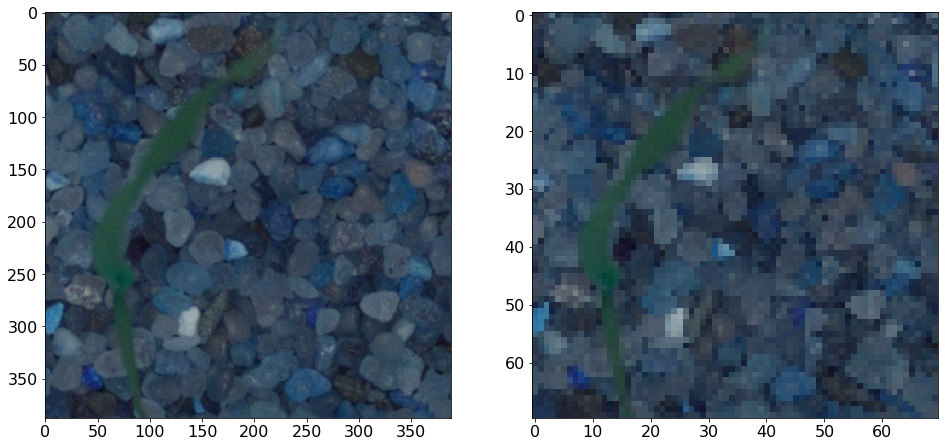

In [18]:
#View one sample image
sample_image_scale = trainSet[1]
sample_image_orig = cv2.imread(images_train[1])
print(sample_image_orig.shape, sample_image_scale.shape)
plt.subplot(1,2,1)
plt.imshow(sample_image_orig)
plt.subplot(1,2,2)
plt.imshow(sample_image_scale)

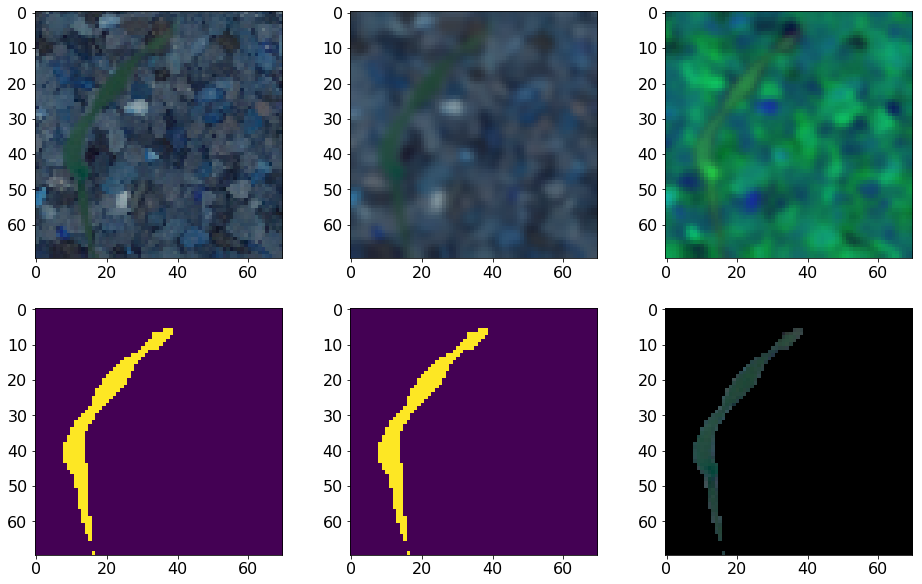

In [19]:
#Experiment preprocessing with one sample image
blurr = cv2.GaussianBlur(sample_image_scale,(5,5),0)
hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
#GREEN PARAMETERS
lower = (25,40,50)
upper = (75,255,255)
mask = cv2.inRange(hsv,lower,upper)
struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
boolean = mask>0
new = np.zeros_like(sample_image_scale,np.uint8)
new[boolean] = sample_image_scale[boolean]
plt.subplot(2,3,1);plt.imshow(sample_image_scale) # ORIGINAL
plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
plt.subplot(2,3,3);plt.imshow(hsv) # HSV CONVERTED
plt.subplot(2,3,4);plt.imshow(mask) # MASKED
plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
plt.subplot(2,3,6);plt.imshow(new) # NEW PROCESSED IMAGE
plt.show()

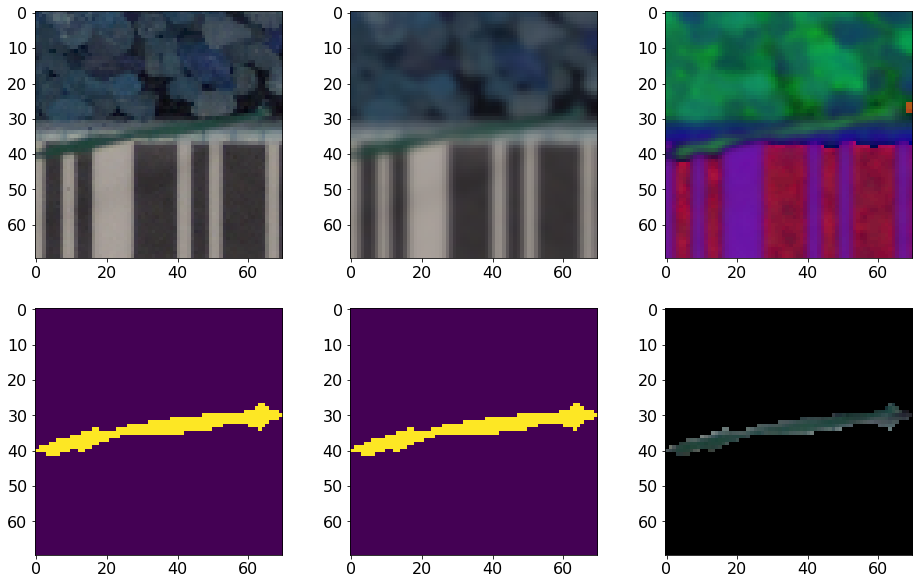

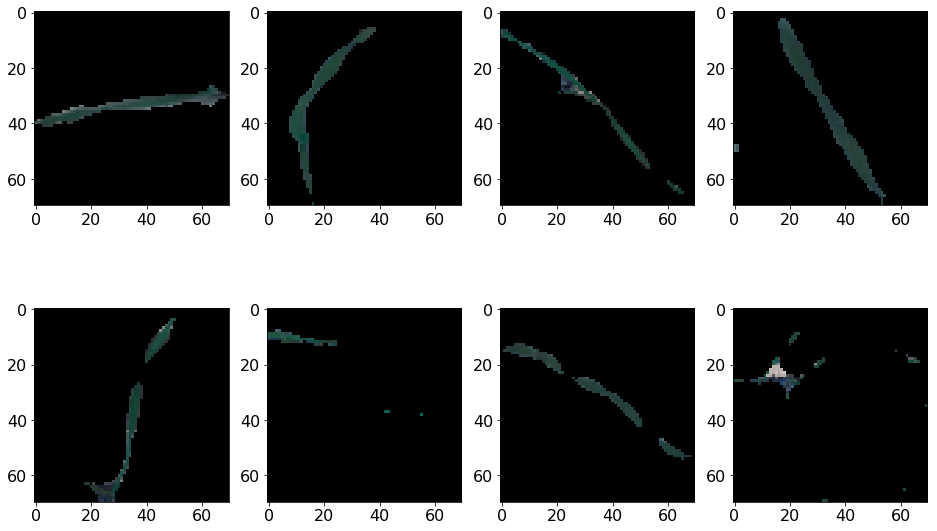

In [21]:
new_train = []
sets = []; getEx = True
for i in trainSet:
    blurr = cv2.GaussianBlur(i,(5,5),0)
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
    #GREEN PARAMETERS
    lower = (25,40,50)
    upper = (75,255,255)
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    new_train.append(new)
    
    if getEx:
        plt.subplot(2,3,1);plt.imshow(i) # ORIGINAL
        plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
        plt.subplot(2,3,3);plt.imshow(hsv) # HSV CONVERTED
        plt.subplot(2,3,4);plt.imshow(mask) # MASKED
        plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
        plt.subplot(2,3,6);plt.imshow(new) # NEW PROCESSED IMAGE
        plt.show()
        getEx = False
new_train = np.asarray(new_train)

# CLEANED IMAGES
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(new_train[i])

LabelEncoder()

Classes['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
12


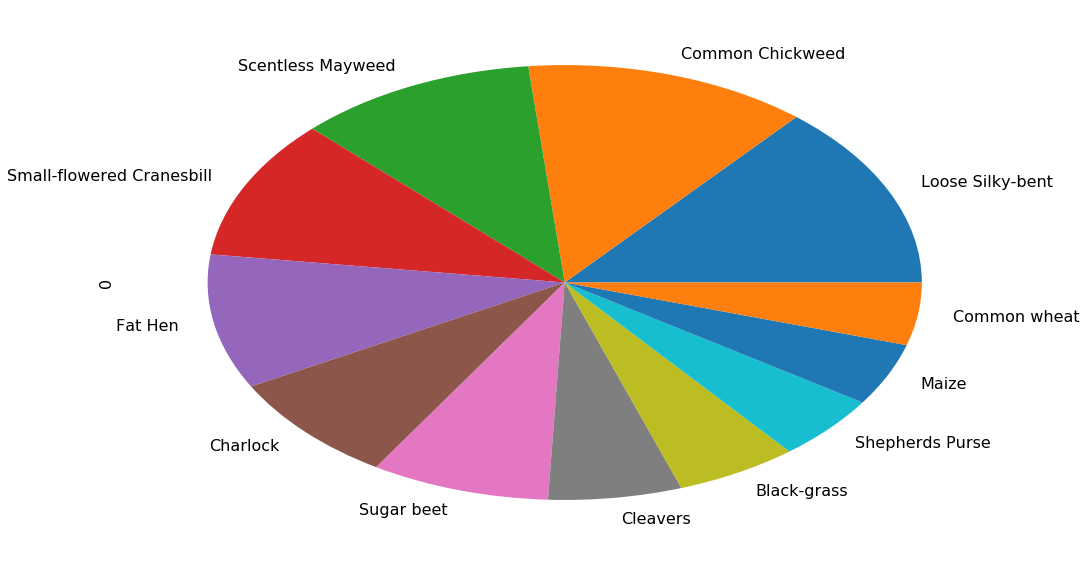

In [23]:
labels = preprocessing.LabelEncoder()
labels.fit(trainLabels[0])
print('Classes'+str(labels.classes_))
encodedlabels = labels.transform(trainLabels[0])
clearalllabels = np_utils.to_categorical(encodedlabels)
classes = clearalllabels.shape[1]
print(str(classes))
trainLabels[0].value_counts().plot(kind='pie')

In [24]:
#Normalize and split into train/validation set
new_train = new_train/255
x_train,x_test,y_train,y_test = train_test_split(new_train,clearalllabels,test_size=0.1,
                                                 random_state=SEED,stratify=clearalllabels)

In [25]:
print(len(x_train),len(x_test))

4275 475


In [26]:
#Define and train the base model 
EPOCHS=15
BATCH_SIZE=75

base_model = Sequential()

base_model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(SCALE, SCALE, 3), activation='relu'))
base_model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
base_model.add(MaxPooling2D((2, 2)))
base_model.add(BatchNormalization(axis=3))
base_model.add(Dropout(0.1))

base_model.add(Flatten())

base_model.add(Dense(classes, activation='softmax'))

base_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

base_model.summary()
base_model.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, validation_data=(x_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 66, 66, 64)        4864      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)  

C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 4275 samples, validate on 475 samples
Epoch 1/15
4275/4275 [==============================] - 285s 67ms/step - loss: 1.4876 - acc: 0.5132 - val_loss: 2.1950 - val_acc: 0.4042
Epoch 2/15
4275/4275 [==============================] - 288s 67ms/step - loss: 0.7750 - acc: 0.7476 - val_loss: 1.4878 - val_acc: 0.5179
Epoch 3/15
4275/4275 [==============================] - 282s 66ms/step - loss: 0.3910 - acc: 0.8756 - val_loss: 1.7537 - val_acc: 0.5874
Epoch 4/15
4275/4275 [==============================] - 282s 66ms/step - loss: 0.1704 - acc: 0.9467 - val_loss: 2.4739 - val_acc: 0.5326
Epoch 5/15
4275/4275 [==============================] - 284s 67ms/step - loss: 0.0709 - acc: 0.9825 - val_loss: 2.7326 - val_acc: 0.5495
Epoch 6/15
4275/4275 [==============================] - 282s 66ms/step - loss: 0.0335 - acc: 0.9939 - val_loss: 3.3995 - val_acc: 0.4800
Epoch 7/15
4275/4275 [==============================] - 285s 67ms/step - loss: 0.0260 - acc: 0.9963 - val_loss: 2.1144 - val_acc: 0

In [ ]:
#Base model is heavily overfitting with high training accuracy and low validation accuracy. 
#Optimize the model exploring on the following: 
#1) Batch Normalization to transform inputs to be mean zero and unit variance for regularization. 
#2) Max pooling to provide abstracted form by down-sampling/reducing dimensionality. 
#3) Drop out layer to randomly ignore randomly selected neurons for regularization


#One such experimented architecture is provided below. 

In [27]:
#Define the model architecture
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(SCALE, SCALE, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(classes, activation='softmax'))
 
    
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 66, 66, 64)        4864      
_________________________________________________________________
batch_normalization_2 (Batch (None, 66, 66, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 31, 31, 64)        256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 27, 27, 128)       204928    
__________

In [28]:
# SETTING UP CHECKPOINTS, CALLBACKS AND REDUCING LEARNING RATE
lrr = ReduceLROnPlateau(monitor='val_acc', 
                        patience=3, 
                        verbose=2, 
                        factor=0.4, 
                        min_lr=0.00001)

filepath="weights.best_{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoints = ModelCheckpoint(filepath, monitor='val_acc', 
                              verbose=2, save_best_only=True, mode='max')
filepath="weights.last_auto4.hdf5"
checkpoints_full = ModelCheckpoint(filepath, monitor='val_acc', 
                                 verbose=2, save_best_only=False, mode='max')

callbacks_list = [checkpoints, lrr, checkpoints_full]

In [29]:
generator = ImageDataGenerator(rotation_range = 180,zoom_range = 0.1,width_shift_range = 0.1,
                               height_shift_range = 0.1,horizontal_flip = True,vertical_flip = True)
generator.fit(x_train)

In [ ]:
# Store Training Results
import datetime 

datetime.datetime.now().strftime("%d.%b %Y %H:%M:%S")
EPOCHS=35
BATCH_SIZE=35
#early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=PATIENCE, verbose=1, mode='auto')
#cb_list = [early_stopping]

# Train the model
#model.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, validation_data=(x_test, y_test), callbacks=callbacks_list)

# Fit the model on batches with real-time data augmentation:
model.fit_generator(generator.flow(x_train, y_train, batch_size=BATCH_SIZE), steps_per_epoch=len(x_train) / BATCH_SIZE, 
                    epochs=EPOCHS, validation_data=(x_test, y_test), callbacks=callbacks_list)


datetime.datetime.now().strftime("%d.%b %Y %H:%M:%S")

'07.Jul 2019 21:40:38'

Epoch 1/35
123/122 [==============================] - 794s 6s/step - loss: 2.4803 - acc: 0.2785 - val_loss: 1.9733 - val_acc: 0.4105

Epoch 00001: val_acc improved from -inf to 0.41053, saving model to weights.best_01-0.41.hdf5

Epoch 00001: saving model to weights.last_auto4.hdf5
Epoch 2/35
123/122 [==============================] - 753s 6s/step - loss: 1.9328 - acc: 0.3789 - val_loss: 3.8335 - val_acc: 0.3305

Epoch 00002: val_acc did not improve from 0.41053

Epoch 00002: saving model to weights.last_auto4.hdf5
Epoch 3/35
 44/122 [=========>....................] - ETA: 9:35 - loss: 1.7795 - acc: 0.4097

In [ ]:
print(model.evaluate(x_train, y_train))  # Evaluate on train set

In [ ]:
print(model.evaluate(x_test, y_test))  # Evaluate on test set

In [ ]:
# PREDICTIONS
y_pred = model.predict(x_test)
y_class = np.argmax(y_pred, axis = 1) 
y_check = np.argmax(y_test, axis = 1) 

#Print confusion matrix
cmatrix = confusion_matrix(y_check, y_class)
print(cmatrix)

In [ ]:
newtestimages = []
sets = []
getEx = True
for i in testset:
    blurr = cv2.GaussianBlur(i,(5,5),0)
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
    
    lower = (25,40,50)
    upper = (75,255,255)
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    boolean = mask>0
    masking = np.zeros_like(i,np.uint8)
    masking[boolean] = i[boolean]
    newtestimages.append(masking)
    
    if getEx:
        plt.subplot(2,3,1);plt.imshow(i)
        plt.subplot(2,3,2);plt.imshow(blurr)
        plt.subplot(2,3,3);plt.imshow(hsv)
        plt.subplot(2,3,4);plt.imshow(mask)
        plt.subplot(2,3,5);plt.imshow(boolean)
        plt.subplot(2,3,6);plt.imshow(masking)
        plt.show()
        getEx=False

newtestimages = np.asarray(newtestimages)
# OTHER MASKED IMAGES
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(newtestimages[i])

In [ ]:
newtestimages=newtestimages/255
prediction = model.predict(newtestimages)
# PREDICTION TO A CSV FILE
pred = np.argmax(prediction,axis=1)
predStr = labels.classes_[pred]
result = {'file':tests,'species':predStr}
result = pd.DataFrame(result)
result.to_csv("Prediction_v4.csv",index=False)